# Подготовка данных

### Проверка и установка рабочей директории, должен быть корень проекта

In [1]:
%pwd

'C:\\Users\\Kuroha\\source\\repos_py\\bauman_final_project\\notebooks'

In [2]:
%cd ..

C:\Users\Kuroha\source\repos_py\bauman_final_project


### Загрузка датасетов:

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils import *

In [4]:
def open_dataset(dataset_name):
    path = get_filepath(dataset_name, is_raw=True)
    return pd.read_csv(path, index_col = ['uid', 'date'], parse_dates=['date'])

weather_df = open_dataset(DATA_WEATHER)
weather_target_df = open_dataset(DATA_WEATHER_TARGET)
water_lvl_df = open_dataset(DATA_WATER_LEVEL)

### Информация о датасетах:

#### water_level

В датасете представлены замеры уровня воды для постов гидрологического контроля с сайта АИС ГМВО.

In [5]:
weather_df.head()

temperature  pressure  cloud weather wind_dir  wind_spd
uid  date                                                               
9386 2008-01-01        -17.0     735.0   dull    snow       ЮЗ       2.0
     2008-01-02        -31.0     747.0    sun   clear       СЗ       2.0
     2008-01-03        -43.0     753.0    sun   clear        З       2.0
     2008-01-04        -34.0     733.0   dull    snow        Ш       0.0
     2008-01-05        -28.0     728.0  suncl   clear        З       1.0

In [6]:
water_lvl_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 98263 entries, (9386, Timestamp('2008-01-01 00:00:00')) to (9568, Timestamp('2017-12-31 00:00:00'))
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   water_level  98263 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB


In [7]:
water_lvl_df.columns

Index(['water_level'], dtype='object')

In [8]:
water_lvl_df.shape

(98263, 1)

#### weather

В датасетах **weather** (погода на период 2008-2017 для обучения) и **weather_test** (погода на 2018 год для предсказывания) с данными метеосводок Gismeteo есть следующие столбцы:
- индекс **uid** - идентификационный номер поста гидрологического контроля с сайта АИС ГМВО.
- индекс **date** - дата замера
- **temperature** - температура
- **pressure** - атмосферное давление
- **cloud** - облачность
- **weather** - погодное явление
- **wind_dir** - направление ветра
- **wind_spd** - скорость ветра в м/с

In [9]:
weather_df.head(5)

temperature  pressure  cloud weather wind_dir  wind_spd
uid  date                                                               
9386 2008-01-01        -17.0     735.0   dull    snow       ЮЗ       2.0
     2008-01-02        -31.0     747.0    sun   clear       СЗ       2.0
     2008-01-03        -43.0     753.0    sun   clear        З       2.0
     2008-01-04        -34.0     733.0   dull    snow        Ш       0.0
     2008-01-05        -28.0     728.0  suncl   clear        З       1.0

In [10]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 102072 entries, (9386, Timestamp('2008-01-01 00:00:00')) to (9518, Timestamp('2017-12-31 00:00:00'))
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   temperature  101236 non-null  float64
 1   pressure     101236 non-null  float64
 2   cloud        100924 non-null  object 
 3   weather      101236 non-null  object 
 4   wind_dir     101236 non-null  object 
 5   wind_spd     101236 non-null  float64
dtypes: float64(3), object(3)
memory usage: 5.1+ MB


In [11]:
weather_df.columns

Index(['temperature', 'pressure', 'cloud', 'weather', 'wind_dir', 'wind_spd'], dtype='object')

In [12]:
weather_df.shape

(102072, 6)

#### weather_target

In [13]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 102072 entries, (9386, Timestamp('2008-01-01 00:00:00')) to (9518, Timestamp('2017-12-31 00:00:00'))
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   temperature  101236 non-null  float64
 1   pressure     101236 non-null  float64
 2   cloud        100924 non-null  object 
 3   weather      101236 non-null  object 
 4   wind_dir     101236 non-null  object 
 5   wind_spd     101236 non-null  float64
dtypes: float64(3), object(3)
memory usage: 5.1+ MB


In [14]:
weather_target_df.head()

temperature  pressure cloud weather wind_dir  wind_spd
uid  date                                                              
9386 2018-01-01        -26.0     760.0  dull   clear        Ю       1.0
     2018-01-02        -20.0     758.0  dull    snow       ЮЗ       3.0
     2018-01-03        -13.0     753.0   sun   clear       ЮЗ       2.0
     2018-01-04        -12.0     749.0  sunc   clear       ЮЗ       2.0
     2018-01-05        -10.0     742.0  dull    snow        З       2.0

In [15]:
weather_target_df.shape

(10220, 6)

### Объединение тренировочных наборов данных:

In [16]:
df = weather_df.join(water_lvl_df)
df.head(), df.info(), df.shape, weather_df.shape

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 102072 entries, (9386, Timestamp('2008-01-01 00:00:00')) to (9518, Timestamp('2017-12-31 00:00:00'))
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   temperature  101236 non-null  float64
 1   pressure     101236 non-null  float64
 2   cloud        100924 non-null  object 
 3   weather      101236 non-null  object 
 4   wind_dir     101236 non-null  object 
 5   wind_spd     101236 non-null  float64
 6   water_level  98065 non-null   float64
dtypes: float64(4), object(3)
memory usage: 9.9+ MB


(                 temperature  pressure  cloud weather wind_dir  wind_spd  \
 uid  date                                                                  
 9386 2008-01-01        -17.0     735.0   dull    snow       ЮЗ       2.0   
      2008-01-02        -31.0     747.0    sun   clear       СЗ       2.0   
      2008-01-03        -43.0     753.0    sun   clear        З       2.0   
      2008-01-04        -34.0     733.0   dull    snow        Ш       0.0   
      2008-01-05        -28.0     728.0  suncl   clear        З       1.0   
 
                  water_level  
 uid  date                     
 9386 2008-01-01        138.0  
      2008-01-02        138.0  
      2008-01-03        138.0  
      2008-01-04        138.0  
      2008-01-05        138.0  ,
 None,
 (102072, 7),
 (102072, 6))

Количество строк до объединения **weather_df** и после осталось тем же.

### Работа с пропусками:

In [17]:
print(f'Размерность water_lvl_df: {water_lvl_df.shape}')
print(f'Размерность weather_df: {weather_df.shape}')
print(f'Размерность df: {df.shape}')
print(f'Размерность weather_target_df: {weather_target_df.shape}')

Размерность water_lvl_df: (98263, 1)
Размерность weather_df: (102072, 6)
Размерность df: (102072, 7)
Размерность weather_target_df: (10220, 6)


В датасете **weather_df** есть строки за каждый день по каждому посту, однако в данных есть пропуски:

In [18]:
df[df.isnull().any(axis=1)]

temperature  pressure cloud weather wind_dir  wind_spd  \
uid  date                                                                 
9386 2011-06-19          NaN       NaN   NaN     NaN      NaN       NaN   
     2012-02-06          NaN       NaN   NaN     NaN      NaN       NaN   
     2013-11-10          1.0     743.0  sunc   clear        З       4.0   
     2013-11-11         -3.0     740.0  dull    snow       ЮЗ       4.0   
     2013-11-12         -7.0     739.0  sunc   clear        З       4.0   
...                      ...       ...   ...     ...      ...       ...   
9518 2016-09-20         10.0     730.0   NaN   clear       ЮЗ       1.0   
     2016-09-28         11.0     728.0   NaN   clear       ЮЗ       2.0   
     2017-08-14         28.0     729.0   NaN   clear       ЮЗ       3.0   
     2017-11-26          NaN       NaN   NaN     NaN      NaN       NaN   
     2017-11-27          NaN       NaN   NaN     NaN      NaN       NaN   

                 water_level  
uid  date                     
9386 2011-06-19        137.0  
     2012-02-06        129.0  
     2013-11-10          NaN  
     2013-11-11          NaN  
     2013-11-12          NaN  
...                      ...  
9518 2016-09-20         79.0  
     2016-09-28         79.0  
     2017-08-14         63.0  
     2017-11-26         81.0  
     2017-11-27         80.0  

[5094 rows x 7 columns]

Рассмотрим данные с поста 9518 за период с 2017-11-25 по 2017-11-28, где отсутствуют метео-данные:

In [19]:
test_start_date = '2017-11-25'
test_end_date   = '2017-11-28'
df.query('uid == 9518 and date >= @test_start_date and date <= @test_end_date')

temperature  pressure cloud weather wind_dir  wind_spd  \
uid  date                                                                 
9518 2017-11-25        -35.0     741.0  sunc   clear        Ю       2.0   
     2017-11-26          NaN       NaN   NaN     NaN      NaN       NaN   
     2017-11-27          NaN       NaN   NaN     NaN      NaN       NaN   
     2017-11-28        -33.0     749.0   sun   clear        Ш       0.0   

                 water_level  
uid  date                     
9518 2017-11-25         81.0  
     2017-11-26         81.0  
     2017-11-27         80.0  
     2017-11-28         80.0

In [20]:
df.isnull().sum()

temperature     836
pressure        836
cloud          1148
weather         836
wind_dir        836
wind_spd        836
water_level    4007
dtype: int64

Для некоторых дат полностью отсутствуют метео-данные. Уберём такие строки:

In [21]:
df.shape

(102072, 7)

In [22]:
print(f'Процент строк с отсутствующими данными об уровне воды: {df["water_level"].isnull().sum() / df.shape[0] * 100:.2f}%')

Процент строк с отсутствующими данными об уровне воды: 3.93%


In [23]:
df = df.dropna(thresh=6)  # 6 - число столбцов у метео-данных
df.shape

(101229, 7)

In [24]:
df.isnull().sum()

temperature       0
pressure          0
cloud           305
weather           0
wind_dir          0
wind_spd          0
water_level    3946
dtype: int64

In [25]:
df.query('uid == 9518 and date >= @test_start_date and date <= @test_end_date')

temperature  pressure cloud weather wind_dir  wind_spd  \
uid  date                                                                 
9518 2017-11-25        -35.0     741.0  sunc   clear        Ю       2.0   
     2017-11-28        -33.0     749.0   sun   clear        Ш       0.0   

                 water_level  
uid  date                     
9518 2017-11-25         81.0  
     2017-11-28         80.0

Остались строки с отсуствующими данные об облачности и уровню воды. Для их исправления используем метод [pd.interpolate()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html), который заменяет пропуски данных с учётом соседей, к которых известны значения, а учитывая, что в датафрейме используется мультииндекс с uid постом наблюдения и датой, будут выбраны только те значения, которые относятся к текущему посту:

In [26]:
test = pd.Series([np.nan, 1, np.nan, np.nan, 4, np.nan])
test

0    NaN
1    1.0
2    NaN
3    NaN
4    4.0
5    NaN
dtype: float64

In [27]:
test.interpolate(limit_direction='both')

0    1.0
1    1.0
2    2.0
3    3.0
4    4.0
5    4.0
dtype: float64

Рассмотрим данные с поста 9386 за период с 2013-11-09 по 2013-11-14, где отсутствуют данные об уровне воды:

In [28]:
test_start_date = '2013-11-09'
test_end_date   = '2013-11-14'
df.query('uid == 9386 and date >= @test_start_date and date <= @test_end_date')

temperature  pressure  cloud weather wind_dir  wind_spd  \
uid  date                                                                  
9386 2013-11-09         -5.0     740.0  suncl   clear        З       2.0   
     2013-11-10          1.0     743.0   sunc   clear        З       4.0   
     2013-11-11         -3.0     740.0   dull    snow       ЮЗ       4.0   
     2013-11-12         -7.0     739.0   sunc   clear        З       4.0   
     2013-11-13        -16.0     735.0   dull    snow        Ш       0.0   
     2013-11-14        -21.0     740.0  suncl    snow        С       3.0   

                 water_level  
uid  date                     
9386 2013-11-09        115.0  
     2013-11-10          NaN  
     2013-11-11          NaN  
     2013-11-12          NaN  
     2013-11-13          NaN  
     2013-11-14          NaN

In [29]:
# замещение отсутствующих данных об уровне воды
df['water_level'] = df['water_level'].interpolate()
df.isnull().sum()

temperature      0
pressure         0
cloud          305
weather          0
wind_dir         0
wind_spd         0
water_level      0
dtype: int64

In [30]:
df.query('uid == 9386 and date >= @test_start_date and date <= @test_end_date')

temperature  pressure  cloud weather wind_dir  wind_spd  \
uid  date                                                                  
9386 2013-11-09         -5.0     740.0  suncl   clear        З       2.0   
     2013-11-10          1.0     743.0   sunc   clear        З       4.0   
     2013-11-11         -3.0     740.0   dull    snow       ЮЗ       4.0   
     2013-11-12         -7.0     739.0   sunc   clear        З       4.0   
     2013-11-13        -16.0     735.0   dull    snow        Ш       0.0   
     2013-11-14        -21.0     740.0  suncl    snow        С       3.0   

                 water_level  
uid  date                     
9386 2013-11-09   115.000000  
     2013-11-10   114.867925  
     2013-11-11   114.735849  
     2013-11-12   114.603774  
     2013-11-13   114.471698  
     2013-11-14   114.339623

### Обработка категориальных признаков:

#### Cloud (облачность):

In [31]:
def print_col_info(column):
    print(f'''describe:
{column.describe(datetime_is_numeric=True)}
{"-" * 80}
unique:
{column.unique()}
{"-" * 80}
nunique:
{column.nunique()}
{"-" * 80}
value_count:
{column.value_counts()}''')

print_col_info(df['cloud'])

describe:
count     100924
unique         4
top         dull
freq       38227
Name: cloud, dtype: object
--------------------------------------------------------------------------------
unique:
['dull' 'sun' 'suncl' 'sunc' nan]
--------------------------------------------------------------------------------
nunique:
4
--------------------------------------------------------------------------------
value_count:
dull     38227
suncl    22966
sun      20984
sunc     18747
Name: cloud, dtype: int64


Облачность может быть следующей:
- **sun** - ясно
- **sunс** - малооблачно
- **suncl** - облачно
- **dull** - пасмурно

Здесь прослеживается порядок - от ясного неба к пасмурному, поэтому для кодирования данного упорядоченного признака необходимо использовать метод Label Encoder.

Реализация данного метода в sklearn перед кодированием [сортирует уникальные признаки в алфавитном порядке](https://github.com/scikit-learn/scikit-learn/blob/f3f51f9b611bf873bd5836748647221480071a87/sklearn/preprocessing/_label.py#L799), в результате чего будет нарушен порядок: **dull** будет закодирован как 0, **sun** - как 1, **sunс** - 2, **suncl** - 3.

In [32]:
df['cloud'] = df['cloud'].map({'sun': 0, 'sunc': 1, 'suncl': 2, 'dull': 3})
df.head(5)

temperature  pressure  cloud weather wind_dir  wind_spd  \
uid  date                                                                  
9386 2008-01-01        -17.0     735.0    3.0    snow       ЮЗ       2.0   
     2008-01-02        -31.0     747.0    0.0   clear       СЗ       2.0   
     2008-01-03        -43.0     753.0    0.0   clear        З       2.0   
     2008-01-04        -34.0     733.0    3.0    snow        Ш       0.0   
     2008-01-05        -28.0     728.0    2.0   clear        З       1.0   

                 water_level  
uid  date                     
9386 2008-01-01        138.0  
     2008-01-02        138.0  
     2008-01-03        138.0  
     2008-01-04        138.0  
     2008-01-05        138.0

In [33]:
df[df.isnull().any(axis=1)]

temperature  pressure  cloud weather wind_dir  wind_spd  \
uid  date                                                                  
9386 2015-09-26          8.0     744.0    NaN   clear       СВ       4.0   
     2015-09-27          8.0     746.0    NaN   clear        Ш       1.0   
     2015-10-10         10.0     741.0    NaN   clear        В       2.0   
     2015-10-24         -9.0     738.0    NaN   clear        Ш       1.0   
     2015-10-31          1.0     725.0    NaN   clear        Ю       2.0   
...                      ...       ...    ...     ...      ...       ...   
9518 2016-07-27         25.0     728.0    NaN   clear        С       2.0   
     2016-09-18         15.0     742.0    NaN   clear        В       1.0   
     2016-09-20         10.0     730.0    NaN   clear       ЮЗ       1.0   
     2016-09-28         11.0     728.0    NaN   clear       ЮЗ       2.0   
     2017-08-14         28.0     729.0    NaN   clear       ЮЗ       3.0   

                 water_level  
uid  date                     
9386 2015-09-26        119.0  
     2015-09-27        119.0  
     2015-10-10        119.0  
     2015-10-24        128.0  
     2015-10-31        131.0  
...                      ...  
9518 2016-07-27         93.0  
     2016-09-18         79.0  
     2016-09-20         79.0  
     2016-09-28         79.0  
     2017-08-14         63.0  

[305 rows x 7 columns]

Т.к. за некоторые дни у нас отсутствует информация об облачности, то необходимо заполнить пропуски. Закодированная погода с помощью метода Label Encoder позволяет заполнить пропуски методом pd.interpolate().

In [34]:
df['cloud'] = df['cloud'].interpolate()
df.isnull().sum()

temperature    0
pressure       0
cloud          0
weather        0
wind_dir       0
wind_spd       0
water_level    0
dtype: int64

Т.к. облачность представлена вещественным типом данных, то после интерполяции получились смежные значения:

In [35]:
df['cloud'].value_counts()

3.000000    38258
2.000000    22992
0.000000    21025
1.000000    18776
1.500000       33
2.500000       21
2.333333       10
2.666667       10
1.400000       10
1.800000       10
2.600000        7
0.666667        7
1.333333        7
2.200000        7
1.600000        6
1.200000        6
1.250000        5
2.250000        5
1.750000        5
0.500000        4
1.333333        3
0.666667        3
0.800000        3
0.400000        3
0.750000        3
2.750000        2
2.142857        1
2.571429        1
1.666667        1
2.333333        1
1.714286        1
1.285714        1
0.428571        1
0.857143        1
Name: cloud, dtype: int64

Данные значения необзодимо перевести в категориальный тип данных, предварительно округлив:

In [36]:
df['cloud'] = df['cloud'].round().astype('category')
df['cloud'].value_counts()

3.0    38278
2.0    23093
0.0    21033
1.0    18825
Name: cloud, dtype: int64

Чтобы в дальнейшем работать с текущими значения внутри мультииндекса, создадим столбец с новым индексом:

In [37]:
df.reset_index(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101229 entries, 0 to 101228
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   uid          101229 non-null  int64         
 1   date         101229 non-null  datetime64[ns]
 2   temperature  101229 non-null  float64       
 3   pressure     101229 non-null  float64       
 4   cloud        101229 non-null  category      
 5   weather      101229 non-null  object        
 6   wind_dir     101229 non-null  object        
 7   wind_spd     101229 non-null  float64       
 8   water_level  101229 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 6.3+ MB


#### uid:

In [38]:
print_col_info(df['uid'])

describe:
count    101229.000000
mean       9427.291063
std          51.920889
min        9386.000000
25%        9393.000000
50%        9408.000000
75%        9420.000000
max        9568.000000
Name: uid, dtype: float64
--------------------------------------------------------------------------------
unique:
[9386 9387 9388 9389 9390 9392 9393 9396 9397 9499 9523 9560 9568 9403
 9404 9405 9406 9408 9410 9413 9415 9416 9417 9419 9420 9421 9422 9518]
--------------------------------------------------------------------------------
nunique:
28
--------------------------------------------------------------------------------
value_count:
9405    3649
9416    3646
9403    3635
9389    3633
9386    3632
9387    3632
9392    3632
9393    3632
9422    3628
9499    3628
9415    3628
9396    3626
9568    3626
9417    3625
9404    3624
9518    3624
9523    3618
9390    3618
9397    3610
9406    3589
9408    3589
9410    3589
9419    3589
9420    3589
9388    3589
9413    3586
9421    3582
9560    35

Представляет собой идентификационный номер поста гидрологического контроля в базе данных сайта АИС ГМВО.

Задачу прогнозирования можно решить двумя способами:
1. Разработать одну модель для всех постов. Это имеет смысл, т.к. посты географически расположены близко друг к другу, а также замеряют уровень воды одной реки.
2. Разработать индивидуальные модели для всех постов.
    
Будет реализовано оба варианта, затем будет выбран наиболее точный вариант.

Для первого варианта необходимо закодировать uid как категориальные данные, используя One Hot Encoding:

In [39]:
def encode_uid(df_target):
    encoder = OneHotEncoder()
    df_uid = pd.DataFrame(encoder.fit_transform(df[['uid']]).toarray())
    df_uid = df_uid.add_prefix('uid_')  # префикс для визуального определения признака
    df_uid = df_uid.astype('category')  # конвертация в категориальный тип данных для экономии памяти
    return df_target.join(df_uid)

df = encode_uid(df)
df.head(2)

,uid,date,temperature,pressure,cloud,weather,wind_dir,wind_spd,water_level,uid_0,...,uid_18,uid_19,uid_20,uid_21,uid_22,uid_23,uid_24,uid_25,uid_26,uid_27
0,9386,2008-01-01,-17.0,735.0,3.0,snow,ЮЗ,2.0,138.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9386,2008-01-02,-31.0,747.0,0.0,clear,СЗ,2.0,138.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101229 entries, 0 to 101228
Data columns (total 37 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   uid          101229 non-null  int64         
 1   date         101229 non-null  datetime64[ns]
 2   temperature  101229 non-null  float64       
 3   pressure     101229 non-null  float64       
 4   cloud        101229 non-null  category      
 5   weather      101229 non-null  object        
 6   wind_dir     101229 non-null  object        
 7   wind_spd     101229 non-null  float64       
 8   water_level  101229 non-null  float64       
 9   uid_0        101229 non-null  category      
 10  uid_1        101229 non-null  category      
 11  uid_2        101229 non-null  category      
 12  uid_3        101229 non-null  category      
 13  uid_4        101229 non-null  category      
 14  uid_5        101229 non-null  category      
 15  uid_6        101229 non-null  cate

#### Date (дата):

In [41]:
print_col_info(df['date'])

describe:
count                           101229
mean     2012-12-21 23:29:38.608896512
min                2008-01-01 00:00:00
25%                2010-06-23 00:00:00
50%                2012-12-15 00:00:00
75%                2015-06-10 00:00:00
max                2017-12-31 00:00:00
Name: date, dtype: object
--------------------------------------------------------------------------------
unique:
['2008-01-01T00:00:00.000000000' '2008-01-02T00:00:00.000000000'
 '2008-01-03T00:00:00.000000000' ... '2015-10-06T00:00:00.000000000'
 '2015-10-07T00:00:00.000000000' '2015-11-18T00:00:00.000000000']
--------------------------------------------------------------------------------
nunique:
3649
--------------------------------------------------------------------------------
value_count:
2012-12-31    28
2014-07-15    28
2014-07-04    28
2014-07-05    28
2014-07-06    28
              ..
2015-09-20     6
2015-09-19     6
2015-09-18     6
2015-09-17     6
2015-11-18     3
Name: date, Length: 3649, 

Представляет собой день наблюдений. Данное значение можно закодировать как:
1. Год - категориальный признак, используя метод Label Encoder (есть порядок: 2008 год был раньше, чем 2017)
2. Номер дня в году - цикличный признак.

Значения дня представляет собой следующий график:

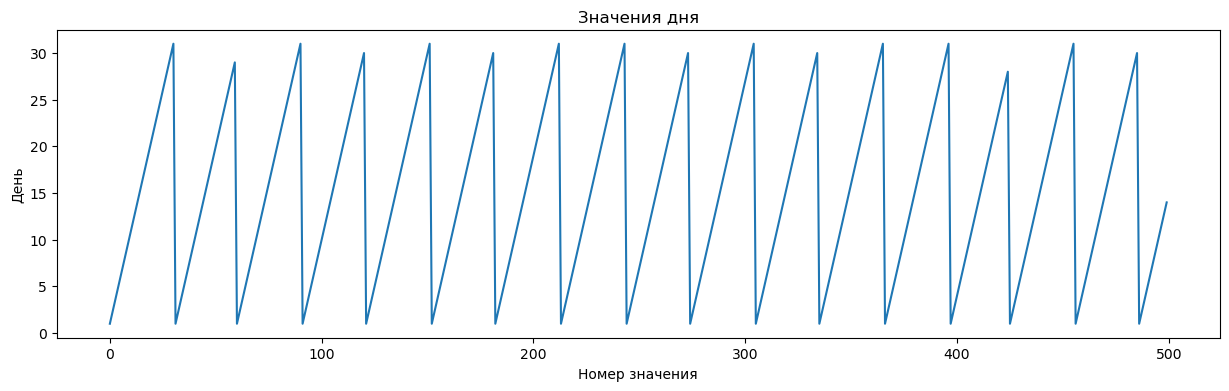

In [74]:
plt.figure(figsize=(15, 4))
plt.plot(df['date'].dt.day[:500])
plt.xlabel('Номер значения')
plt.ylabel('День')
plt.title('Значения дня')

plt.show()

Данные являются зацикленными, т.к. 31 день в месяце отличается от следующего 1-го дня лишь на одну единицу, а не на 30. Значение дня в году [можно представить в виде двух функций](http://blog.davidkaleko.com/feature-engineering-cyclical-features.html):

$x_{sin} = \sin(\frac{2 * \pi * x}{\max(x)})$

$x_{cos} = \cos(\frac{2 * \pi * x}{\max(x)})$

In [78]:
test_day = 70
np.sin(2 * np.pi * test_day/365.0), np.cos(2 * np.pi * test_day/365.0)

(0.9338372288229252, 0.35769823883312546)

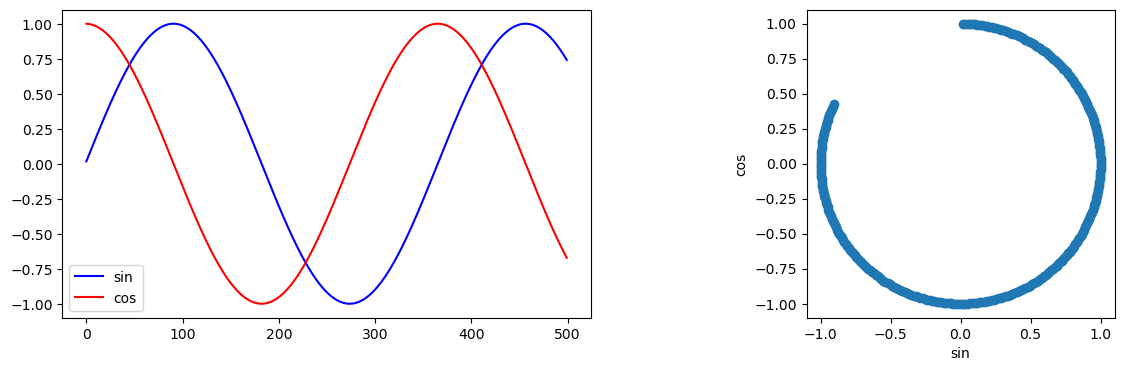

In [114]:
test_df = df[0:500]['date']
test_arr = test_df.dt.dayofyear
test_sin = np.sin(2 * np.pi * test_arr / total_years)
test_cos = np.cos(2 * np.pi * test_arr / total_years)

fig = plt.figure(figsize=(15, 4))

ax1 = fig.add_subplot(121)
ax1.plot(test_sin, color='blue', label='sin')
ax1.plot(test_cos, color='red', label='cos')
ax1.legend()


# показ точек на графике за 300 дней

ax2 = fig.add_subplot(122)
ax2.set_aspect('equal')
ax2.scatter(test_sin[:300], test_cos[:300])
ax2.set_xlabel('sin')
ax2.set_ylabel('cos')

plt.show()

Закодируем день года:

In [139]:
total_years = np.where(df['date'].dt.is_leap_year, 366, 365)
df['year'] = df['date'].dt.year
df['day_sin'] = np.sin(2 * np.pi * df['date'].dt.dayofyear / total_years)
df['day_cos'] = np.cos(2 * np.pi * df['date'].dt.dayofyear / total_years)
df[['date', 'year', 'day_sin', 'day_cos']].head()

,date,year,day_sin,day_cos
0,2008-01-01,2008,0.017166,0.999853
1,2008-01-02,2008,0.034328,0.999411
2,2008-01-03,2008,0.051479,0.998674
3,2008-01-04,2008,0.068615,0.997643
4,2008-01-05,2008,0.085731,0.996318


#### Weather (осадки)

In [133]:
print_col_info(df['weather'])

describe:
count     101229
unique         4
top        clear
freq       77584
Name: weather, dtype: object
--------------------------------------------------------------------------------
unique:
['snow' 'clear' 'rain' 'storm']
--------------------------------------------------------------------------------
nunique:
4
--------------------------------------------------------------------------------
value_count:
clear    77584
snow     17113
rain      5854
storm      678
Name: weather, dtype: int64


Под осадками может пониматься следующее:
- **clear** - осадков не было
- **rain** - дождь
- **storm** - гроза
- **snow** - снег

Данный признак можно закодировать разными способами:
1. Выделение признака **наличие осадков**: и дождь, и снег образовываются из капель воды, а грозы, как правило, сопровождаются сильным дождём;
2. Объединение понятий "гроза" и "дождь", выделив 2 признака: **дождь** и **снег**;
3. 3 признака: **дождь**, **гроза**, **снег**, т.к. бывают сухие грозы.

Во всех случаях отсутствие осадков обозначается 0 во всех признаках.

In [134]:
df['weather_v1_precip'] = df['weather'].map({'clear': 0, 'rain': 1, 'storm': 1, 'snow': 1})

df['weather_v2_rain'] = df['weather'].map({'clear': 0, 'rain': 1, 'storm': 1, 'snow': 0})

# снег одинаково обозначается во 2 и 3 случаях
df['weather_snow'] = df['weather'].map({'clear': 0, 'rain': 0, 'storm': 0, 'snow': 1})

df['weather_v3_rain'] = df['weather'].map({'clear': 0, 'rain': 1, 'storm': 0, 'snow': 0})
df['weather_v3_storm'] = df['weather'].map({'clear': 0, 'rain': 0, 'storm': 1, 'snow': 0})

df = df.drop(['weather'], axis=1)
df.head()

,uid,date,temperature,pressure,cloud,wind_dir,wind_spd,water_level,uid_0,uid_1,...,uid_25,uid_26,uid_27,day_sin,day_cos,weather_v1_precip,weather_v2_rain,weather_snow,weather_v3_rain,weather_v3_storm
0,9386,2008-01-01,-17.0,735.0,3.0,ЮЗ,2.0,138.0,1.0,0.0,...,0.0,0.0,0.0,0.017166,0.999853,1,0,1,0,0
1,9386,2008-01-02,-31.0,747.0,0.0,СЗ,2.0,138.0,1.0,0.0,...,0.0,0.0,0.0,0.034328,0.999411,0,0,0,0,0
2,9386,2008-01-03,-43.0,753.0,0.0,З,2.0,138.0,1.0,0.0,...,0.0,0.0,0.0,0.051479,0.998674,0,0,0,0,0
3,9386,2008-01-04,-34.0,733.0,3.0,Ш,0.0,138.0,1.0,0.0,...,0.0,0.0,0.0,0.068615,0.997643,1,0,1,0,0
4,9386,2008-01-05,-28.0,728.0,2.0,З,1.0,138.0,1.0,0.0,...,0.0,0.0,0.0,0.085731,0.996318,0,0,0,0,0


#### Wind_dir (направление ветра)

In [137]:
print_col_info(df['wind_dir'])

describe:
count     101229
unique         9
top            Ш
freq       16679
Name: wind_dir, dtype: object
--------------------------------------------------------------------------------
unique:
['ЮЗ' 'СЗ' 'З' 'Ш' 'С' 'ЮВ' 'СВ' 'В' 'Ю']
--------------------------------------------------------------------------------
nunique:
9
--------------------------------------------------------------------------------
value_count:
Ш     16679
З     16402
ЮЗ    15370
Ю     12948
СЗ     9530
С      8907
ЮВ     8403
В      7647
СВ     5343
Name: wind_dir, dtype: int64


Направление ветра обозначается как основными сторонами света: **С**евер, **Ю**г, **З**апад, **В**осток, так и промежуточными направлениями: **С**еверо-**З**апад, **С**еверо-**В**осток, **Ю**го-**З**апад, **Ю**го-**В**осток. Отсуствие ветра - **Ш**тиль.
Данный признак можно закодировать 4 столбцами, а именно как стороны света.

In [138]:
values = list(df['wind_dir'].unique())[:-1]  # убираем nan

north_dict = {val:(1 if 'С' in val else 0) for val in values}  # север
south_dict = {val:(1 if 'Ю' in val else 0) for val in values}  # юг
west_dict = {val:(1 if 'З' in val else 0) for val in values}   # запад
east_dict = {val:(1 if 'В' in val else 0) for val in values}   # восток

df['north'] = df['wind_dir'].map(north_dict)
df['south'] = df['wind_dir'].map(south_dict)
df['west'] = df['wind_dir'].map(west_dict)
df['east'] = df['wind_dir'].map(east_dict)

df = df.drop(['wind_dir'], axis=1)
df[['north', 'south', 'west', 'east']].head()

,north,south,west,east
0,0.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101229 entries, 0 to 101228
Data columns (total 47 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   uid                101229 non-null  int64         
 1   date               101229 non-null  datetime64[ns]
 2   temperature        101229 non-null  float64       
 3   pressure           101229 non-null  float64       
 4   cloud              101229 non-null  category      
 5   wind_spd           101229 non-null  float64       
 6   water_level        101229 non-null  float64       
 7   uid_0              101229 non-null  category      
 8   uid_1              101229 non-null  category      
 9   uid_2              101229 non-null  category      
 10  uid_3              101229 non-null  category      
 11  uid_4              101229 non-null  category      
 12  uid_5              101229 non-null  category      
 13  uid_6              101229 non-null  category

In [141]:
# конвертируем float в категориальный тип данных для уменьшения использования памяти
for dtype in ['weather_v1_precip', 'weather_snow', 'weather_v2_rain', 
              'weather_v3_rain', 'weather_v3_storm', 'north', 'south', 'west', 'east']:
    df[dtype] = df[dtype].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101229 entries, 0 to 101228
Data columns (total 47 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   uid                101229 non-null  int64         
 1   date               101229 non-null  datetime64[ns]
 2   temperature        101229 non-null  float64       
 3   pressure           101229 non-null  float64       
 4   cloud              101229 non-null  category      
 5   wind_spd           101229 non-null  float64       
 6   water_level        101229 non-null  float64       
 7   uid_0              101229 non-null  category      
 8   uid_1              101229 non-null  category      
 9   uid_2              101229 non-null  category      
 10  uid_3              101229 non-null  category      
 11  uid_4              101229 non-null  category      
 12  uid_5              101229 non-null  category      
 13  uid_6              101229 non-null  category